In [1]:
import pandas as pd

import yfinance as yf
from datetime import date

# get daily price TS from yahoo fin 
start_time = date.fromisoformat('2020-01-01')
end_time = date.fromisoformat('2020-12-31')

# 1.1 Importing gold ETF prices (GLD) for 2020
gld_df = yf.download('GLD', start_time, end_time, auto_adjust=True)
gld_series = gld_df[['Close']]

# 1.2 Importing equity ETF prices (MCHI) for 2020
mchi_df = yf.download('MCHI', start_time, end_time, auto_adjust=True)
mchi_series = mchi_df[['Close']]

# 1.2 Importing BTC-USD exch rate for 2020
import pandas_datareader as pdr
btc_series = pdr.get_data_yahoo(['BTC-USD'], 
                          start=start_time, 
                          end=end_time)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# 2.1 Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020
gld_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns

,Close
Date,
2020-04-01,0.000000
2020-04-02,0.016393
2020-04-03,0.004937
2020-04-06,0.027711
2020-04-07,-0.005354
...,...
2020-12-23,0.006648
2020-12-24,0.003985
2020-12-28,-0.003629


In [14]:
mchi_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # MCHI daily returns

,Close
Date,
2020-04-01,0.000000
2020-04-02,0.030067
2020-04-03,-0.011781
2020-04-06,0.039324
2020-04-07,0.000171
...,...
2020-12-23,0.005798
2020-12-24,-0.027318
2020-12-28,-0.002834


In [15]:
btc_series=['2020-04-01':'2020-12-31'].pct_change().fillna(0) # BTC-USD daily returns

Symbols,BTC-USD
Date,
2020-04-01,0.000000
2020-04-02,-0.008867
2020-04-03,0.019922
2020-04-04,-0.011125
2020-04-05,0.070776
...,...
2020-12-27,-0.006231
2020-12-28,0.030927
2020-12-29,0.010250


In [31]:
# 3.1 Compute a 20-day moving average price of your GOLD ETF.  The moving average price on 1 April 2020 should include data from March.
gld_ma = gld_series['2020-03-05':'2020-12-31'].rolling(window=20).mean().dropna()
gld_ma=gld_ma.rename(columns={"Close": "GLD 20day MA"})
gld_series=gld_series.rename(columns={"Close": "GLD Price"})

In [34]:
# 3.2 Compute a 20-day moving average price of your equity ETF.  The moving average price on 1 April 2020 should include data from March.
mchi_ma=mchi_series['2020-03-05':'2020-12-31'].rolling(window=20).mean().dropna()
mchi_ma=mchi_ma.rename(columns={"Close": "MCHI 20day MA"})
mchi_series=mchi_series.rename(columns={"Close": "MCHI Price"})

In [36]:
# 3.3 Compute a 20-day moving average price of bitcoin.  The moving average price on 1 April 2020 should include data from March.
btc_ma=btc_series['2020-03-14':'2020-12-31'].rolling(window=20).mean().dropna()
btc_ma=btc_ma.rename(columns={"BTC-USD": "BTC-USD 20day MA"})
btc_series=btc_series.rename(columns={"BTC-USD": "BTC-USD"})

<AxesSubplot:xlabel='Date'>

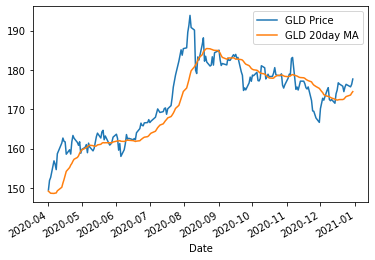

In [32]:
# 4.1 Graph each price series along with its moving average from April 2020 through Dec 2020.
ax = gld_series['2020-04-01':'2020-12-31'].plot()
gld_ma.plot(ax=ax)

<AxesSubplot:xlabel='Date'>

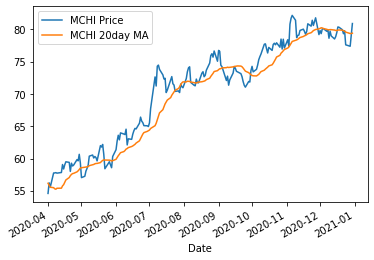

In [37]:
ax = mchi_series['2020-04-01':'2020-12-31'].plot()
mchi_ma.plot(ax=ax)

<AxesSubplot:xlabel='Date'>

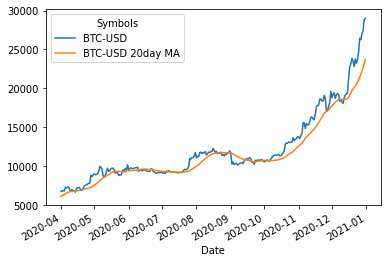

In [39]:
ax = btc_series['2020-04-01':'2020-12-31'].plot()
btc_ma.plot(ax=ax)

In [ ]:
# 4.2 Comments on how the price series and average series intersect or not.

# The price series does seems to intersect the MA during periods of lowered volatiilty following heightened volatility. This occurs more frequently in GLD compared to MCHI and BTC.

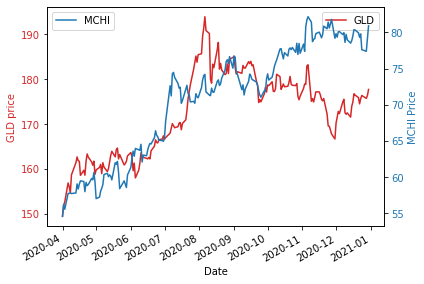

In [60]:
# 4.3 Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
mchi_plt = mchi_series['2020-04-01':'2020-12-31']
gld_plt = gld_series['2020-04-01':'2020-12-31']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax1.set_ylabel('GLD price', color=color)
ax1.plot(gld_plt.index, gld_plt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['GLD'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MCHI Price', color=color)  # we already handled the x-label with ax1
ax2.plot(mchi_plt.index, mchi_plt, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['MCHI'])
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate()
plt.show()


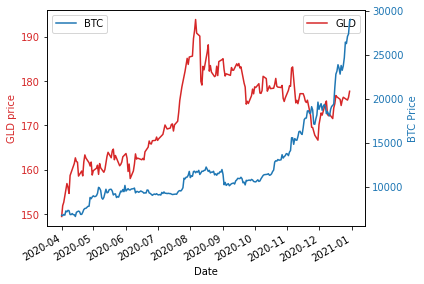

In [62]:
# 4.4 Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
btc_plt = btc_series['2020-04-01':'2020-12-31']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax1.set_ylabel('GLD price', color=color)
ax1.plot(gld_plt.index, gld_plt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['GLD'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BTC Price', color=color)  # we already handled the x-label with ax1
ax2.plot(btc_plt.index, btc_plt, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['BTC'])
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate()
plt.show()


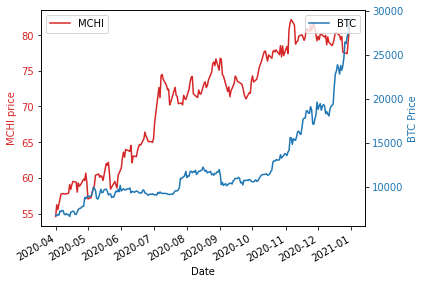

In [71]:
# 4.5 Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax1.set_ylabel('MCHI price', color=color)
ax1.plot(mchi_plt.index, mchi_plt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['MCHI'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BTC Price', color=color)  # we already handled the x-label with ax1
ax2.plot(btc_plt.index, btc_plt, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['BTC'],loc='upper right')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate()
plt.show()

In [100]:
# 5.1 Pick one of the 3 series (gold, equity, or bitcoin).  Fit a GARCH model for Q2.  Fit a GARCH model for Q3.  Fit a GARCH model for Q4

from arch import arch_model
import numpy as np

gld_returns = pd.DataFrame(np.diff(np.log(gld_df['Close'].values)))
gld_returns.index = gld_df.index.values[1:gld_df.index.values.shape[0]]
gld_returns.columns = ['GLD Returns']

am = arch_model(gld_returns['2020-04-01':'2020-06-30'])
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     51,   Neg. LLF: 220717939940.79132
Optimization terminated successfully    (Exit mode 0)
            Current function value: -200.30500435089374
            Iterations: 11
            Function evaluations: 71
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                200.305
Distribution:                  Normal   AIC:                          -392.610
Method:            Maximum Likelihood   BIC:                          -384.037
                                        No. Observations:                   63
Date:                Tue, Jan 26 2021   Df Residuals:                       59
Time:                        13:03:50   Df Model:                            4
      

In [101]:
am = arch_model(gld_returns['2020-07-01':'2020-09-30'])
res = am.fit(update_freq=5)
print(res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -191.51995349398538
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                191.520
Distribution:                  Normal   AIC:                          -375.040
Method:            Maximum Likelihood   BIC:                          -366.404
                                        No. Observations:                   64
Date:                Tue, Jan 26 2021   Df Residuals:                       60
Time:                        13:04:46   Df Model:                            4
                                  Mean Model                                 
  

In [102]:
am = arch_model(gld_returns['2020-10-01':'2020-12-31'])
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     41,   Neg. LLF: -198.8317588175519
Iteration:     10,   Func. Count:     66,   Neg. LLF: -188.99502325456794
Iteration:     15,   Func. Count:     96,   Neg. LLF: -198.82368469428894
Iteration:     20,   Func. Count:    131,   Neg. LLF: 285003954158.3053
Iteration:     25,   Func. Count:    166,   Neg. LLF: 158073.80589599937
Iteration:     30,   Func. Count:    205,   Neg. LLF: -198.64630106124798
Iteration:     35,   Func. Count:    236,   Neg. LLF: -198.12349286754633
Optimization terminated successfully    (Exit mode 0)
            Current function value: -199.0202294675453
            Iterations: 39
            Function evaluations: 252
            Gradient evaluations: 36
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH 

In [105]:
# 5.2 Repeat the process, but instead using GARCH-M Model
from arch.univariate import ARCH, GARCH

ar = arch_model(gld_returns['2020-04-01':'2020-06-30'])
ar.volatility = GARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                200.544
Distribution:                  Normal   AIC:                          -385.089
Method:            Maximum Likelihood   BIC:                          -367.944
                                        No. Observations:                   63
Date:                Tue, Jan 26 2021   Df Residuals:                       55
Time:                        13:55:53   Df Model:                            8
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.5048e-03  1.060e-02      0.142      0.887 

In [106]:
ar = arch_model(gld_returns['2020-07-01':'2020-09-30'])
ar.volatility = GARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                192.789
Distribution:                  Normal   AIC:                          -369.577
Method:            Maximum Likelihood   BIC:                          -352.306
                                        No. Observations:                   64
Date:                Tue, Jan 26 2021   Df Residuals:                       56
Time:                        14:50:25   Df Model:                            8
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.6261e-04  1.956e-03      0.185      0.853 

In [107]:
ar = arch_model(gld_returns['2020-10-01':'2020-12-31'])
ar.volatility = GARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                198.801
Distribution:                  Normal   AIC:                          -381.602
Method:            Maximum Likelihood   BIC:                          -364.457
                                        No. Observations:                   63
Date:                Tue, Jan 26 2021   Df Residuals:                       55
Time:                        14:50:29   Df Model:                            8
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0436e-05  1.073e-03  9.725e-03      0.992 

In [109]:
# 5.3 Repeat the process one more time, using another variation of GARCH (e.g. Threshold GARCH, Exponential GARCH, Integrated GARCH)

# EGARCH
from arch.univariate import EGARCH

eg = arch_model(gld_returns['2020-04-01':'2020-06-30'])
eg.volatilty = EGARCH(p=5)
res = eg.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                200.305
Distribution:                  Normal   AIC:                          -392.610
Method:            Maximum Likelihood   BIC:                          -384.037
                                        No. Observations:                   63
Date:                Tue, Jan 26 2021   Df Residuals:                       59
Time:                        15:04:43   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5623e-03  3.076e-04      5.079  3.785e-07 [9.

In [110]:
eg = arch_model(gld_returns['2020-07-01':'2020-09-30'])
eg.volatilty = EGARCH(p=5)
res = eg.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                191.520
Distribution:                  Normal   AIC:                          -375.040
Method:            Maximum Likelihood   BIC:                          -366.404
                                        No. Observations:                   64
Date:                Tue, Jan 26 2021   Df Residuals:                       60
Time:                        15:05:11   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.8131e-04  1.689e-03      0.403      0.687 

In [111]:
eg = arch_model(gld_returns['2020-10-01':'2020-12-31'])
eg.volatilty = EGARCH(p=5)
res = eg.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                199.020
Distribution:                  Normal   AIC:                          -390.040
Method:            Maximum Likelihood   BIC:                          -381.468
                                        No. Observations:                   63
Date:                Tue, Jan 26 2021   Df Residuals:                       59
Time:                        15:05:13   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.4429e-04  7.128e-06     20.242  4.188e-91 [1.

In [ ]:
# 5.4 What are the 3 long-term variances indicated by the models.

# 1. q2: (alpha - 1 + beta) = 0.05 - 1 + 0.8499 = -0.1001
# 1. q3: (alpha - 1 + beta) = 0.2 - 1 + 0.7 =  -0.1
# 1. q4: (alpha - 1 + beta) = 3.683e-7 - 1 + 0.9111 = -0.088

# 2. q2: (alpha - 1 + beta) = 0.04 - 1 + 0.7 = -0.26
# 2. q3: (alpha - 1 + beta) = 0.04 - 1 + 0.5 = 0.46
# 2. q4: (alpha - 1 + beta) = 1.9937e-03 - 1 + 0.4885 = -0.5095

# 3. q2: (alpha - 1 + beta) = 0.05 - 1 + 0.8499 = -0.1001
# 3. q3: (alpha - 1 + beta) = 0.2 - 1 + 0.7 = -0.1
# 3. q4: (alpha - 1 + beta) = 3.68e-07 - 1 + 0.911 = -0.0889

In [116]:
# 6.1 Pick 1 of the 3 quarters in 2020 (Q2, Q3, or Q4).  Test your gold ETF for stationarity.  Explicitly state which test you used to determine stationarity

# Selected the Augmented Dickey-Fuller test to determine stationarity in Q1 2020

from statsmodels.tsa.stattools import adfuller

result = adfuller(gld_series['2020-01-01':'2020-03-31'])
print("ADF statistic:",result[0])
print("p-value:", result[1])

# Using a 5% threshold, we reject the null hypothesis, suggesting the time series does not have a unit root, and is stationary.

ADF statistic: -2.9254012332076598
p-value: 0.042472913885934716


In [117]:
# 6.2 Using the same quarter, test your equity ETF for stationarity.  Explicitly state which test you used to determine stationarity

# Selected the Augmented Dickey-Fuller test to determine stationarity in Q1 2020
result = adfuller(mchi_series['2020-01-01':'2020-03-31'])
print("ADF statistic:",result[0])
print("p-value:", result[1])

# Using a 5% threshold, we fail to reject the null hypothesis, suggesting the time series has a unit root, and is non-stationary.

ADF statistic: -0.9413267228312828
p-value: 0.7740585761348038


In [118]:
# 6.3 Using the same quarter, test Bitcoin for stationarity.  Explicitly state which test you used to determine stationarity

# Selected the Augmented Dickey-Fuller test to determine stationarity in Q1 2020
result = adfuller(btc_series['2020-01-01':'2020-03-31'])
print("ADF statistic:",result[0])
print("p-value:", result[1])

# Using a 5% threshold, we fail to reject the null hypothesis, suggesting the time series has a unit root, and is non-stationary.

ADF statistic: -1.5027670199435659
p-value: 0.5321420923099992


In [152]:
# 7.1 Using Q2 data, Test all the 3 combinations of cointegration using Engle-Granger.
from arch.unitroot import engle_granger

eg_test1 = engle_granger(gld_series['2020-04-01':'2020-06-30'], mchi_series['2020-04-01':'2020-06-30'])
eg_test1

Test Statistic,-3.838
P-value,0.012
ADF Lag length,0
Estimated Root ρ (γ+1),0.677


In [181]:
merged_df = mchi_series.merge(btc_series, left_index=True, right_index=True).merge(gld_series, left_index=True, right_index=True)['2020-04-01':'2020-06-30']

In [154]:
eg_test2 = engle_granger(merged_df['MCHI Price'], merged_df['BTC-USD'])
eg_test2

Test Statistic,-1.956
P-value,0.550
ADF Lag length,0
Estimated Root ρ (γ+1),0.875


In [155]:
eg_test3 = engle_granger(merged_df['GLD Price'], merged_df['BTC-USD'])
eg_test3

Test Statistic,-3.346
P-value,0.049
ADF Lag length,0
Estimated Root ρ (γ+1),0.740


In [156]:
# 7.2 Are there any cointegrating vectors?
# GLD/MCHI and GLD/BTC are cointegrated at the 5% and 10% critical values, respectively. Their cointegrating vectors are below:
eg_test1.cointegrating_vector

GLD Price       1.000000
MCHI Price     -0.827528
const        -110.993417
dtype: float64

In [158]:
eg_test3.cointegrating_vector

GLD Price      1.000000
BTC-USD       -0.001703
const       -146.355815
dtype: float64

In [183]:
# 7.3 If yes, run a Vector Error Correction Model and interpret the results.  If no, re-test for cointegration using Engle-Granger
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.base.datetools import dates_from_str

model = VECM(merged_df)
vecm_res = model.fit()
vecm_res.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,-0.1356,0.116,-1.172,0.241,-0.362,0.091
L1.BTC-USD,0.0012,0.000,2.938,0.003,0.000,0.002
L1.GLD Price,0.1535,0.074,2.077,0.038,0.009,0.298
,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,-9.2252,35.605,-0.259,0.796,-79.011,60.560
L1.BTC-USD,-0.0788,0.126,-0.627,0.531,-0.325,0.168
L1.GLD Price,-13.2240,22.754,-0.581,0.561,-57.822,31.374
,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,-0.0635,0.208,-0.305,0.760,-0.471,0.344
L1.BTC-USD,0.0011,0.001,1.442,0.149,-0.000,0.002


In [185]:
# 7.4 Using Q3 data, Test all the 3 combinations of cointegration using Engle-Granger.

merged_df_q3 = mchi_series.merge(btc_series, left_index=True, right_index=True).merge(gld_series, left_index=True, right_index=True)['2020-07-01':'2020-09-30']

eg_test1 = engle_granger(merged_df_q3['GLD Price'], merged_df_q3['MCHI Price'])
eg_test1

Test Statistic,-1.590
P-value,0.724
ADF Lag length,0
Estimated Root ρ (γ+1),0.922


In [186]:
eg_test2 = engle_granger(merged_df_q3['BTC-USD'], merged_df_q3['MCHI Price'])
eg_test2

Test Statistic,-1.775
P-value,0.643
ADF Lag length,0
Estimated Root ρ (γ+1),0.904


In [187]:
eg_test3 = engle_granger(merged_df_q3['GLD Price'], merged_df_q3['BTC-USD'])
eg_test3

Test Statistic,-3.457
P-value,0.037
ADF Lag length,0
Estimated Root ρ (γ+1),0.683


In [189]:
# 7.5 Are there any cointegrating vectors?

# Yes, the GLD/BTC pair shows cointegration at 5% confidence. Cointegrating vector is below:
eg_test3.cointegrating_vector

GLD Price      1.000000
BTC-USD       -0.005965
const       -116.069954
dtype: float64

In [190]:
# 7.6 If yes, run a Vector Error Correction Model.  I

model_q3 = VECM(merged_df_q3)
vecm_res_q3 = model_q3.fit()
vecm_res_q3.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,0.0636,0.133,0.478,0.633,-0.197,0.325
L1.BTC-USD,0.0010,0.000,2.081,0.037,5.86e-05,0.002
L1.GLD Price,-0.0660,0.072,-0.921,0.357,-0.206,0.074
,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,41.9383,32.626,1.285,0.199,-22.008,105.885
L1.BTC-USD,-0.0645,0.119,-0.543,0.587,-0.297,0.168
L1.GLD Price,-2.8344,17.559,-0.161,0.872,-37.249,31.581
,coef,std err,z,P>|z|,[0.025,0.975]
L1.MCHI Price,0.1222,0.240,0.510,0.610,-0.348,0.592
L1.BTC-USD,0.0028,0.001,3.229,0.001,0.001,0.005


In [ ]:
# 7.7 If any 2 sets are cointegrated, Do the results from Q2 cointegration testing help predict the coefficients from Q3 cointegration?

# Yes, the Q2 results (coefficients) are similar to those for Q3 for the GLD/BTC pair.

In [ ]:
# 7.8 What are the significant changes, if any?  Be specific with regards to the values of the parameters!

# The most significant change in the parameters for the Engle Granger tests are the cointegrating vectors, specifically the constant term. The cointegration coefficents are similar, as is the esimated unit root value.

In [ ]:
# 8.1 Does correlation have a direction?  In other words, is the correlation of x and y equal to correlation of y and x?

# Correlation does not have a direction, ie. the correlation of some variables X and Y is equal to the correlation of Y and X.

In [ ]:
# 8.2 Does linear regression have a direction?  Are the slope and intercept the same if x is regressed on y, or y is regressed on x?

# Linear regression has a direction, insofar that there exists a significant difference if Y is regressed on X vs X regressed on Y. The slope and interecept would not be the same, unless X = Y.

In [ ]:
# 8.3 Does cointegration have a direction?  Will the cointegrating vector be the same if x is regressed on y, or if y is regressed on x?

# Cointegration does not have a direction; the cointegrating vector will be the same regardless of which variable comes first. The columns of the vector may be switched, but they will correspond to the same input variable. 